# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [19]:
import pandas as pd

In [20]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6677,41,Private,128354,Bachelors,13,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,25,United-States,>50K
16182,56,Private,145574,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
27106,32,Private,117963,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,45,United-States,<=50K
1623,44,Private,147206,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
17339,26,Private,176729,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,45,United-States,>50K
24278,33,Private,168030,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,32,United-States,<=50K
29025,56,Self-emp-not-inc,201318,9th,5,Married-civ-spouse,Exec-managerial,Other-relative,White,Male,3411,0,50,Columbia,<=50K
4438,68,Private,128472,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,>50K
3915,51,Private,186338,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
8686,59,Private,157932,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K


#Importarea librariilor necesare si aducerea datelor de test/ train:

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle
import joblib   

#Incarcarea datelor preprocesate:

In [22]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

#Verificare rapida a tipurilor de date:

In [23]:
display(X_train.dtypes.value_counts())

bool     37
int64     7
Name: count, dtype: int64

#Adaugarea setului de validare din setul de train:

In [24]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print('Train:', X_tr.shape, 'Validation:', X_val.shape, 'Test:', X_test.shape)

Train: (20823, 44) Validation: (5206, 44) Test: (6508, 44)


#Indicii de evaluare (metricile):

Pentru evaluarea performantei modelelor de regresie se vor folosi urmatoarele metrici:
-> MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), R² (R-squared).

Metrica principala pentru selectia modelului de regresie este RMSE, intrucat acest scor penalizeaza mai mult erorile mari, fiind mai util pentru valorile extreme.

Modelul final va fi selectat in baza valorii RMSE pentru setul de validare, iar performanta finala se rapoarteaza pe test.

In [25]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

def evaluate_model(name, model, X_train_, y_train_, X_val_, y_val_):
    model.fit(X_train_, y_train_)
    pred_tr = model.predict(X_train_)
    pred_val = model.predict(X_val_)
    m_tr = regression_metrics(y_train_, pred_tr)
    m_val = regression_metrics(y_val_, pred_val)
    row = {
        'Experiment': name,
        'Model': type(model).__name__,
        **{f'train_{k}': v for k, v in m_tr.items()},
        **{f'val_{k}': v for k, v in m_val.items()},
    }
    return row, model

results = []

#Modelele de regresie baseline (SGDRegressor, Decision Tree, LinearRegression):

In [26]:
# 1) LinearRegression:
row, lin_model = evaluate_model(
    'LinearRegression',
    LinearRegression(),
    X_tr, y_tr, X_val, y_val
)
results.append(row)

# 2) SGDRegressor:
sgd_base = SGDRegressor(
    loss='squared_error',
    max_iter=2000,
    tol=1e-3,
    random_state=42
)
row, sgd_model = evaluate_model(
    'SGDRegressor',
    sgd_base,
    X_tr, y_tr, X_val, y_val
)
results.append(row)

# 3) Decision Tree:
row, dt_model = evaluate_model(
    'DecisionTreeRegressor',
    DecisionTreeRegressor(random_state=42),
    X_tr, y_tr, X_val, y_val
)
results.append(row)

# 4) Random Forest:
row, rf_model = evaluate_model(
    'RandomForestRegressor',
    RandomForestRegressor(random_state=42, n_estimators=200, n_jobs=-1),
    X_tr, y_tr, X_val, y_val
)
results.append(row)

pd.DataFrame(results).sort_values('val_RMSE')


C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Experiment,Model,train_MAE,train_MSE,train_RMSE,train_R2,val_MAE,val_MSE,val_RMSE,val_R2
0,LinearRegression,LinearRegression,4.341106e+00,2.926700e+01,5.409898e+00,2.342553e-01,4.360830e+00,2.977928e+01,5.457040e+00,2.173509e-01
3,RandomForestRegressor,RandomForestRegressor,1.607522e+00,4.253802e+00,2.062475e+00,8.887031e-01,4.351434e+00,3.110167e+01,5.576887e+00,1.825963e-01
2,DecisionTreeRegressor,DecisionTreeRegressor,6.651299e-03,4.305936e-02,2.075075e-01,9.988734e-01,5.277516e+00,5.540944e+01,7.443752e+00,-4.562524e-01
1,SGDRegressor,SGDRegressor,1.565803e+19,3.200434e+38,1.788976e+19,-8.373649e+36,1.580725e+19,3.253561e+38,1.803763e+19,-8.550898e+36


#Experimentare pe SGDRegressor (loss & hiperparametri de baza), deoarece SGD este sensibil la learning rate si regularizare:

In [27]:
sgd_huber = SGDRegressor(
    loss='huber',
    epsilon=1.35,
    alpha=0.0001,
    learning_rate='invscaling',
    eta0=0.01,
    max_iter=4000,
    tol=1e-3,
    random_state=42
)
row, _ = evaluate_model(
    'SGD - huber + invscaling',
    sgd_huber,
    X_tr, y_tr, X_val, y_val
)
results.append(row)

sgd_l2_stronger = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=0.001,
    learning_rate='invscaling',
    eta0=0.01,
    max_iter=4000,
    tol=1e-3,
    random_state=42
)
row, _ = evaluate_model(
    'SGD - squared_error + stronger L2',
    sgd_l2_stronger,
    X_tr, y_tr, X_val, y_val
)
results.append(row)

sgd_elastic = SGDRegressor(
    loss='squared_error',
    penalty='elasticnet',
    alpha=0.0005,
    l1_ratio=0.15,
    learning_rate='invscaling',
    eta0=0.01,
    max_iter=4000,
    tol=1e-3,
    random_state=42
)
row, _ = evaluate_model(
    'SGD - squared_error + elasticnet',
    sgd_elastic,
    X_tr, y_tr, X_val, y_val
)
results.append(row)

pd.DataFrame(results).sort_values('val_RMSE').head(10)


C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

,Experiment,Model,train_MAE,train_MSE,train_RMSE,train_R2,val_MAE,val_MSE,val_RMSE,val_R2
0,LinearRegression,LinearRegression,4.341106e+00,2.926700e+01,5.409898e+00,2.342553e-01,4.360830e+00,2.977928e+01,5.457040e+00,2.173509e-01
3,RandomForestRegressor,RandomForestRegressor,1.607522e+00,4.253802e+00,2.062475e+00,8.887031e-01,4.351434e+00,3.110167e+01,5.576887e+00,1.825963e-01
2,DecisionTreeRegressor,DecisionTreeRegressor,6.651299e-03,4.305936e-02,2.075075e-01,9.988734e-01,5.277516e+00,5.540944e+01,7.443752e+00,-4.562524e-01
4,SGD - huber + invscaling,SGDRegressor,1.096488e+06,1.577396e+12,1.255944e+06,-4.127116e+10,1.105861e+06,1.601472e+12,1.265493e+06,-4.208935e+10
6,SGD - squared_error + elasticnet,SGDRegressor,1.551334e+19,3.150651e+38,1.775007e+19,-8.243397e+36,1.566158e+19,3.201593e+38,1.789300e+19,-8.414319e+36
5,SGD - squared_error + stronger L2,SGDRegressor,1.554894e+19,3.163558e+38,1.778639e+19,-8.277167e+36,1.569807e+19,3.214852e+38,1.793001e+19,-8.449166e+36
1,SGDRegressor,SGDRegressor,1.565803e+19,3.200434e+38,1.788976e+19,-8.373649e+36,1.580725e+19,3.253561e+38,1.803763e+19,-8.550898e+36


#Feature Engineering & experimente - se vor testa cateva transformari simple:


In [28]:
# Copiem seturile si adaugam cateva features noi:
def add_features(df):
    out = df.copy()
    # Interactiune: varsta si educatia pot influenta impreuna programul de lucru
    if 'age' in out.columns and 'education-num' in out.columns:
        out['age_x_edu'] = out['age'] * out['education-num']
    # Logaritmare pentru capital-gain
    if 'capital-gain' in out.columns:
        out['log_capital_gain'] = np.log1p(out['capital-gain'])
    return out

X_tr_fe = add_features(X_tr)
X_val_fe = add_features(X_val)
X_test_fe = add_features(X_test)

# Pentru modele liniare: scalarea coloanelor continue:
numeric_cols_fe = X_tr_fe.select_dtypes(include=['int64','float64']).columns
dummy_like_fe = [c for c in numeric_cols_fe if set(X_tr_fe[c].dropna().unique()).issubset({0,1})]
cont_cols_fe = [c for c in numeric_cols_fe if c not in dummy_like_fe]

scaler_fe = StandardScaler()
if len(cont_cols_fe) > 0:
    scaler_fe.fit(X_tr_fe[cont_cols_fe])

def scale_continuous_fe(X_df):
    X_out = X_df.copy()
    if len(cont_cols_fe) > 0:
        X_out[cont_cols_fe] = scaler_fe.transform(X_out[cont_cols_fe])
    return X_out

X_tr_fe_scaled = scale_continuous_fe(X_tr_fe)
X_val_fe_scaled = scale_continuous_fe(X_val_fe)
X_test_fe_scaled = scale_continuous_fe(X_test_fe)

# Retestarea modelelor liniare cu FE:
row, _ = evaluate_model(
    'FE - LinearRegression (age_x_edu + log_capital_gain)',
    LinearRegression(),
    X_tr_fe_scaled, y_tr, X_val_fe_scaled, y_val
)
results.append(row)

row, _ = evaluate_model(
    'FE - SGDRegressor (squared_error)',
    SGDRegressor(loss='squared_error', max_iter=4000, tol=1e-3, random_state=42),
    X_tr_fe_scaled, y_tr, X_val_fe_scaled, y_val
)
results.append(row)

pd.DataFrame(results).sort_values('val_RMSE').head(10)


C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Experiment,Model,train_MAE,train_MSE,train_RMSE,train_R2,val_MAE,val_MSE,val_RMSE,val_R2
7,FE - LinearRegression (age_x_edu + log_capital...,LinearRegression,4.335807e+00,2.922657e+01,5.406160e+00,2.353130e-01,4.356566e+00,2.973692e+01,5.453157e+00,2.184642e-01
0,LinearRegression,LinearRegression,4.341106e+00,2.926700e+01,5.409898e+00,2.342553e-01,4.360830e+00,2.977928e+01,5.457040e+00,2.173509e-01
8,FE - SGDRegressor (squared_error),SGDRegressor,4.355386e+00,2.941113e+01,5.423203e+00,2.304841e-01,4.380065e+00,2.991067e+01,5.469065e+00,2.138977e-01
3,RandomForestRegressor,RandomForestRegressor,1.607522e+00,4.253802e+00,2.062475e+00,8.887031e-01,4.351434e+00,3.110167e+01,5.576887e+00,1.825963e-01
2,DecisionTreeRegressor,DecisionTreeRegressor,6.651299e-03,4.305936e-02,2.075075e-01,9.988734e-01,5.277516e+00,5.540944e+01,7.443752e+00,-4.562524e-01
4,SGD - huber + invscaling,SGDRegressor,1.096488e+06,1.577396e+12,1.255944e+06,-4.127116e+10,1.105861e+06,1.601472e+12,1.265493e+06,-4.208935e+10
6,SGD - squared_error + elasticnet,SGDRegressor,1.551334e+19,3.150651e+38,1.775007e+19,-8.243397e+36,1.566158e+19,3.201593e+38,1.789300e+19,-8.414319e+36
5,SGD - squared_error + stronger L2,SGDRegressor,1.554894e+19,3.163558e+38,1.778639e+19,-8.277167e+36,1.569807e+19,3.214852e+38,1.793001e+19,-8.449166e+36
1,SGDRegressor,SGDRegressor,1.565803e+19,3.200434e+38,1.788976e+19,-8.373649e+36,1.580725e+19,3.253561e+38,1.803763e+19,-8.550898e+36


#Hyperparameter Tuning (dupa baseline si experimente):

Se face vace tuning pentru modelul de DecisionTree ai cel de RandomForest, apoi o comparatie cu rezultatele existente.

In [29]:
from sklearn.model_selection import GridSearchCV

# Tuning DecisionTree:
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeRegressor(random_state=42)
dt_gs = GridSearchCV(dt, dt_params, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1)
dt_gs.fit(X_tr, y_tr)

best_dt = dt_gs.best_estimator_
print('Best DecisionTree params:', dt_gs.best_params_)

row, _ = evaluate_model(
    'Tuned - DecisionTreeRegressor (GridSearchCV)',
    best_dt,
    X_tr, y_tr, X_val, y_val
)
results.append(row)

# Tuning RandomForest:
rf_params = {
    'n_estimators': [200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 5]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_gs = GridSearchCV(rf, rf_params, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1)
rf_gs.fit(X_tr, y_tr)

best_rf = rf_gs.best_estimator_
print('Best RandomForest params:', rf_gs.best_params_)

row, _ = evaluate_model(
    'Tuned - RandomForestRegressor (GridSearchCV)',
    best_rf,
    X_tr, y_tr, X_val, y_val
)
results.append(row)

# Tabel cu rezultate (ordonat dupa valoarea RMSE pe validare)
results_df = pd.DataFrame(results).sort_values('val_RMSE')
display(results_df.head(15))

best_row = results_df.iloc[0]
print('Best experiment on validation (RMSE):')
display(best_row)

Best DecisionTree params: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best RandomForest params: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 400}


C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Experiment,Model,train_MAE,train_MSE,train_RMSE,train_R2,val_MAE,val_MSE,val_RMSE,val_R2
10,Tuned - RandomForestRegressor (GridSearchCV),RandomForestRegressor,3.952869e+00,2.498441e+01,4.998441e+00,3.463052e-01,4.239407e+00,2.884553e+01,5.370803e+00,2.418916e-01
7,FE - LinearRegression (age_x_edu + log_capital...,LinearRegression,4.335807e+00,2.922657e+01,5.406160e+00,2.353130e-01,4.356566e+00,2.973692e+01,5.453157e+00,2.184642e-01
0,LinearRegression,LinearRegression,4.341106e+00,2.926700e+01,5.409898e+00,2.342553e-01,4.360830e+00,2.977928e+01,5.457040e+00,2.173509e-01
8,FE - SGDRegressor (squared_error),SGDRegressor,4.355386e+00,2.941113e+01,5.423203e+00,2.304841e-01,4.380065e+00,2.991067e+01,5.469065e+00,2.138977e-01
9,Tuned - DecisionTreeRegressor (GridSearchCV),DecisionTreeRegressor,4.362448e+00,2.983183e+01,5.461852e+00,2.194768e-01,4.438061e+00,3.081873e+01,5.551462e+00,1.900325e-01
3,RandomForestRegressor,RandomForestRegressor,1.607522e+00,4.253802e+00,2.062475e+00,8.887031e-01,4.351434e+00,3.110167e+01,5.576887e+00,1.825963e-01
2,DecisionTreeRegressor,DecisionTreeRegressor,6.651299e-03,4.305936e-02,2.075075e-01,9.988734e-01,5.277516e+00,5.540944e+01,7.443752e+00,-4.562524e-01
4,SGD - huber + invscaling,SGDRegressor,1.096488e+06,1.577396e+12,1.255944e+06,-4.127116e+10,1.105861e+06,1.601472e+12,1.265493e+06,-4.208935e+10
6,SGD - squared_error + elasticnet,SGDRegressor,1.551334e+19,3.150651e+38,1.775007e+19,-8.243397e+36,1.566158e+19,3.201593e+38,1.789300e+19,-8.414319e+36
5,SGD - squared_error + stronger L2,SGDRegressor,1.554894e+19,3.163558e+38,1.778639e+19,-8.277167e+36,1.569807e+19,3.214852e+38,1.793001e+19,-8.449166e+36


Best experiment on validation (RMSE):


Experiment    Tuned - RandomForestRegressor (GridSearchCV)
Model                                RandomForestRegressor
train_MAE                                         3.952869
train_MSE                                        24.984413
train_RMSE                                        4.998441
train_R2                                          0.346305
val_MAE                                           4.239407
val_MSE                                          28.845527
val_RMSE                                          5.370803
val_R2                                            0.241892
Name: 10, dtype: object

#Plot: Learning curve pentru SGD (train vs validation):

Intrucat SGD permite antrenare iterativa, vor fi simulate “epoci” cu `partial_fit` si va fi urmarita scaderea valorii RMSE (pentru observarea invatarii modelului, valoarea RMSE trebuie sa scada constant).

C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

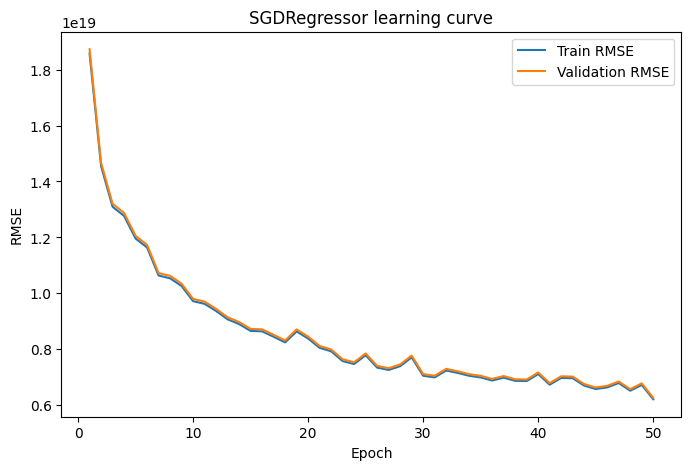

Ultimul RMSE train: 6.213839500761526e+18 Ultimul RMSE val: 6.265558462266351e+18


In [ ]:
sgd_lc = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=0.0005,
    learning_rate='invscaling',
    eta0=0.01,
    random_state=42,
    warm_start=True
)

# Initializare: fit o singura data cu max_iter=1 si apoi refacere partial_fit
# SGDRegressor suporta partial_fit pentru regresie
train_rmse = []
val_rmse = []

# resetare coeficienti (in caz ca rerulam celula)
sgd_lc = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=0.0005,
    learning_rate='invscaling',
    eta0=0.01,
    random_state=42
)

# partial_fit cere y ca array
for epoch in range(1, 51):
    sgd_lc.partial_fit(X_tr, y_tr)
    pred_tr = sgd_lc.predict(X_tr)
    pred_val = sgd_lc.predict(X_val)
    train_rmse.append(np.sqrt(mean_squared_error(y_tr, pred_tr)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, pred_val)))

plt.figure(figsize=(8,5))
plt.plot(range(1, 51), train_rmse, label='Train RMSE')
plt.plot(range(1, 51), val_rmse, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('SGDRegressor learning curve')
plt.legend()
plt.show()

print('Ultimul RMSE train:', train_rmse[-1], 'Ultimul RMSE val:', val_rmse[-1])


#Interpretarea graficului learning curve (SGD):

In graficul de mai sus, curba de Train RMSE indica cat de bine se potriveste modelul pe datele de antrenare, iar curba de Validation RMSE arata cat de bine generalizeaza modelul pe date noi (setul de validare).

Asadar, scaderea treptata a ambelor curbe sugereaza ca optimizarea prin gradient descent conduce spre o solutie mai buna. De asemenea, train si validation sunt apropiate pe parcurs, modelul nu supra-invata si are o rata de generalizare rezonabila. Graficul indica absenta overfitting-ului si al underfitting-ului in model.

#Se continua cu evaluarea finala pe test si salvarea celui mai performant model:

,Experiment,Model,train_MAE,train_MSE,train_RMSE,train_R2,val_MAE,val_MSE,val_RMSE,val_R2
0,Tuned - RandomForestRegressor (GridSearchCV),RandomForestRegressor,3.952869e+00,2.498441e+01,4.998441e+00,3.463052e-01,4.239407e+00,2.884553e+01,5.370803e+00,2.418916e-01
1,FE - LinearRegression (age_x_edu + log_capital...,LinearRegression,4.335807e+00,2.922657e+01,5.406160e+00,2.353130e-01,4.356566e+00,2.973692e+01,5.453157e+00,2.184642e-01
2,LinearRegression,LinearRegression,4.341106e+00,2.926700e+01,5.409898e+00,2.342553e-01,4.360830e+00,2.977928e+01,5.457040e+00,2.173509e-01
3,FE - SGDRegressor (squared_error),SGDRegressor,4.355386e+00,2.941113e+01,5.423203e+00,2.304841e-01,4.380065e+00,2.991067e+01,5.469065e+00,2.138977e-01
4,Tuned - DecisionTreeRegressor (GridSearchCV),DecisionTreeRegressor,4.362448e+00,2.983183e+01,5.461852e+00,2.194768e-01,4.438061e+00,3.081873e+01,5.551462e+00,1.900325e-01
5,RandomForestRegressor,RandomForestRegressor,1.607522e+00,4.253802e+00,2.062475e+00,8.887031e-01,4.351434e+00,3.110167e+01,5.576887e+00,1.825963e-01
6,DecisionTreeRegressor,DecisionTreeRegressor,6.651299e-03,4.305936e-02,2.075075e-01,9.988734e-01,5.277516e+00,5.540944e+01,7.443752e+00,-4.562524e-01
7,SGD - huber + invscaling,SGDRegressor,1.096488e+06,1.577396e+12,1.255944e+06,-4.127116e+10,1.105861e+06,1.601472e+12,1.265493e+06,-4.208935e+10
8,SGD - squared_error + elasticnet,SGDRegressor,1.551334e+19,3.150651e+38,1.775007e+19,-8.243397e+36,1.566158e+19,3.201593e+38,1.789300e+19,-8.414319e+36
9,SGD - squared_error + stronger L2,SGDRegressor,1.554894e+19,3.163558e+38,1.778639e+19,-8.277167e+36,1.569807e+19,3.214852e+38,1.793001e+19,-8.449166e+36


Best on validation: Tuned - RandomForestRegressor (GridSearchCV) | RandomForestRegressor


C:\Users\teo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test metrics: {'MAE': 4.190681398245231, 'MSE': 28.156561554359484, 'RMSE': np.float64(5.306275676438182), 'R2': 0.27156835350896447}


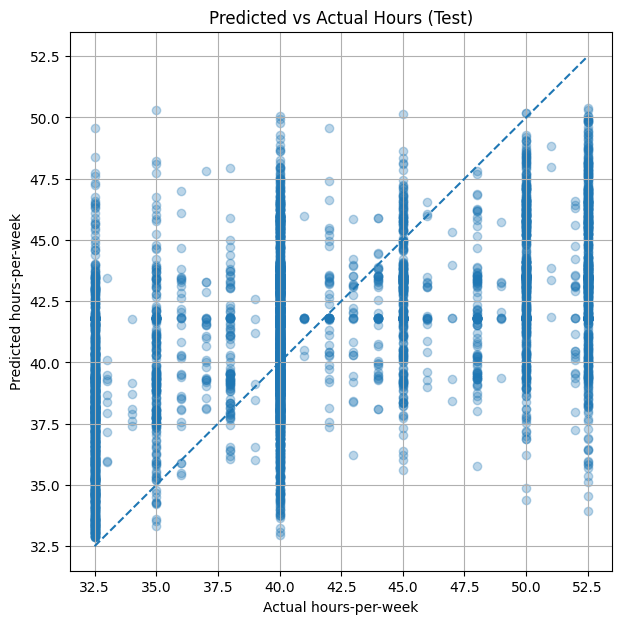

salvare fisier: best_regression_model.joblib si test_predictions.csv


In [ ]:
# Selectarea celui mai bun model pe baza RMSE (validare)
import joblib

results_df = pd.DataFrame(results).sort_values('val_RMSE').reset_index(drop=True)
display(results_df.head(10))

best_exp = results_df.loc[0, 'Experiment']
best_model_name = results_df.loc[0, 'Model']
print('Best on validation:', best_exp, '|', best_model_name)

# Reconstruirea modelului "best" (cel mai bun)
best_model = None
use_scaled = False
use_fe = False

if best_exp == 'Tuned - RandomForestRegressor (GridSearchCV)':
    best_model = best_rf
elif best_exp == 'Tuned - DecisionTreeRegressor (GridSearchCV)':
    best_model = best_dt
elif 'RandomForestRegressor' in best_model_name:
    best_model = rf_model
elif 'DecisionTreeRegressor' in best_model_name:
    best_model = dt_model
elif 'SGDRegressor' in best_model_name:
    # alegerea unei configuratii bune
    if 'huber' in best_exp:
        best_model = sgd_huber
    elif 'elasticnet' in best_exp:
        best_model = sgd_elastic
    elif 'stronger L2' in best_exp:
        best_model = sgd_l2_stronger
    else:
        best_model = sgd_base
    use_scaled = True
elif 'LinearRegression' in best_model_name:
    best_model = LinearRegression()
    use_scaled = True

# Daca cel mai bun model (best) e pe feature engineering (FE), vor fi folosite seturile FE
if best_exp.startswith('FE - '):
    use_fe = True
    use_scaled = True

# Construim train_full = train + val
X_full = pd.concat([X_tr, X_val], axis=0)
y_full = pd.concat([y_tr, y_val], axis=0)

if use_fe:
    X_full = add_features(X_full)
    X_test_final_num = add_features(X_test_num)
    # rescalare pe full
    numeric_cols_full = X_full.select_dtypes(include=['int64','float64']).columns
    dummy_like_full = [c for c in numeric_cols_full if set(X_full[c].dropna().unique()).issubset({0,1})]
    cont_cols_full = [c for c in numeric_cols_full if c not in dummy_like_full]
    scaler_full = StandardScaler()
    if len(cont_cols_full) > 0:
        scaler_full.fit(X_full[cont_cols_full])

    def scale_full(df):
        out = df.copy()
        if len(cont_cols_full) > 0:
            out[cont_cols_full] = scaler_full.transform(out[cont_cols_full])
        return out

    X_full = scale_full(X_full_num)
    X_test_final = scale_full(X_test_final_num)
elif use_scaled:
    # folosim scaler deja fit pe X_tr (aprox). Mai corect: refit pe full.
    scaler_full = StandardScaler()
    # refacem pe full pe coloanele continue initiale
    X_full_num2 = bool_to_int(X_full_num)
    X_test_num2 = bool_to_int(X_test_num)
    numeric_cols_full = X_full_num2.select_dtypes(include=['int64','float64']).columns
    dummy_like_full = [c for c in numeric_cols_full if set(X_full_num2[c].dropna().unique()).issubset({0,1})]
    cont_cols_full = [c for c in numeric_cols_full if c not in dummy_like_full]
    if len(cont_cols_full) > 0:
        scaler_full.fit(X_full_num2[cont_cols_full])

    def scale_full(df):
        out = df.copy()
        if len(cont_cols_full) > 0:
            out[cont_cols_full] = scaler_full.transform(out[cont_cols_full])
        return out

    X_full = scale_full(X_full_num2)
    X_test_final = scale_full(X_test_num2)


# Antrenare finala + evaluare pe test
best_model.fit(X_full, y_full)

### - pentru eliminarea erorii NameError
if 'X_test_final' not in globals():
    X_test_final = X_test.copy()
########################################

# IMPORTANT: coloanele din test trebuie aliniate intai la cele folosite la fit
X_test_aligned = X_test_final.reindex(columns=X_full.columns, fill_value=0)

# verificare pentru posibile erori:
assert list(X_test_aligned.columns) == list(X_full.columns)

test_pred = best_model.predict(X_test_aligned)

test_metrics = regression_metrics(y_test, test_pred)
print("Test metrics:", test_metrics)


# Scatterplot predicted vs actual
y_true_plot = np.ravel(y_test)
y_pred_plot = np.ravel(test_pred)

plt.figure(figsize=(7,7))
plt.scatter(y_true_plot, y_pred_plot, alpha=0.3)

# linia diagonala
min_val = min(y_true_plot.min(), y_pred_plot.min())
max_val = max(y_true_plot.max(), y_pred_plot.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.xlabel('Actual hours-per-week')
plt.ylabel('Predicted hours-per-week')
plt.title('Predicted vs Actual Hours (Test)')
plt.grid(True)
plt.show()


# Salvarea modelului + a predictiilor:
joblib.dump(best_model, "best_regression_model.joblib")

y_true_1d = np.ravel(y_test)
y_pred_1d = np.ravel(test_pred)

pd.DataFrame({"y_true": y_true_1d, "y_pred": y_pred_1d}).to_csv("test_predictions.csv", index=False)

print("salvare fisier: best_regression_model.joblib si test_predictions.csv")


#Interpretare scatterplot Predicted vs Actual hours per week (Test):

Sunt comparate valorile reale ale targetului hours-per-week cu predictiile modelului de pe setul de test. Diagonala punctata reprezinta cazul ideal in care predictia ar fi perfecta (y = x).

In cazul de fata, avem o dispersie mare a datelor in jurul diagonalei, deci erori ridicate ale modelului. Desi valoarea RMSE este buna in medie, aici putem observa vizual ca erorile sunt concentrare in relativ multe intervaluri ale targetului. 

#Concluzii & observatii:

Am comparat mai multe modele (liniare si nonliniare) pe acelasi set de date preprocesat (din Task-ul 1). Am folosit RMSE drept metrica principala intrucat penalizeaza mai puternic erorile mari si este facil de interpretat in unitatea targetului (hours/per/week).

Modelul de regrsie SGD (ori Ridge/ Lasso), necesita standardizarea datelor si sunt potrivite pentru seturile de date unde relatiile sunt aproximativ liniare. Acestea pot fi imbunatatite si prin intermediul feature engineering si prin transformari (logaritmari, de ex.).

De asemenea, modelele de regresie de tip RandomForest/DecisionTree pot surprinde relatii nonliniare si interactiuni fara feature engineering explicit, dar pot necesita tuning pentru generalizare si pentru evitarea overfitting-ului. 

Cel mai bun model a fost modelul de regresie RandomForestRegressor, tuned cu GridSearchCV pentru reducerea overfitting-ului, intrucat a obtinut valoarea RMSE cea mai mica pe setul de validation, fiind apoi confirmat pe setul de test. Acest model este cel mai potrivit, intrucat relatiile dintre variabile sunt nonliniare, orele lucrate nefiind impactate in mod liniar de catre variabilele varsta, educatie, etc., acest model fiind asadar cel mai robust la zgomotul datelor.

#Posibile imbunatatiri ale modelelor:
- Mai mult feature engineering (de tipul polynomial features, interactiuni selectate, transformari log pentru distributiile foarte asimetrice)
- Tuning mai extins pentru RandomForest sau incercarea unor modele de boosting (Gradient Boosting)
- Analiza de erori pentru valori extreme (persoane cu 80-99 ore lucrate/saptamana).